# Sampling in Python

 https://app.datacamp.com/learn/courses/sampling-in-python

 **Important** - use conda environment datacamp for this notebook

 In terminal: 

 * list environments: `conda env list` 
 * activate environment: `conda activate your_environment_name`
 * deactivate environment: `conda deactivate`


## Intro to sampling

* population - complete dataset
* sample - subset of data working with

`df.sample(n='integer')` - returns a random sample

* population parameter = calculation made on the population dataset, e.g. population mean
* point estimate or sample statistic - calculation made on the sample dataset

In [1]:
# example
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read feather file
spotify_population = pd.read_feather('spotify_2000_2020.feather')

In [6]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
print(spotify_sample)

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population['duration_minutes'].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample['duration_minutes'].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

       acousticness                     artists  danceability  duration_ms  \
25310       0.38300          ['Los Terricolas']         0.261     245880.0   
38454       0.18100   ['The Derek Trucks Band']         0.551     302307.0   
29012       0.11800  ['The Head and the Heart']         0.642     196055.0   
19898       0.00168               ['Powerwolf']         0.228     270707.0   
32858       0.03990               ['BLACKPINK']         0.707     197355.0   
...             ...                         ...           ...          ...   
4286        0.85100            ['Natalie Cole']         0.307     210907.0   
33840       0.74300                    ['Seal']         0.659     324067.0   
10998       0.19800         ['Cali Life Style']         0.872     289213.0   
39254       0.10600         ['Rain Sounds ACE']         0.000     164452.0   
17448       0.26800    ['The Notorious B.I.G.']         0.723     249587.0   

       duration_minutes  energy  explicit                      

In [9]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-7.76254


### convenience sampling

* convenience sampling - getting data by the easiest method, may introduce bias
  * e.g. Literary Digest - Landon and Roosevelt

* visualising selection bias with `.hist(bins=np.arange(low, high, width))`

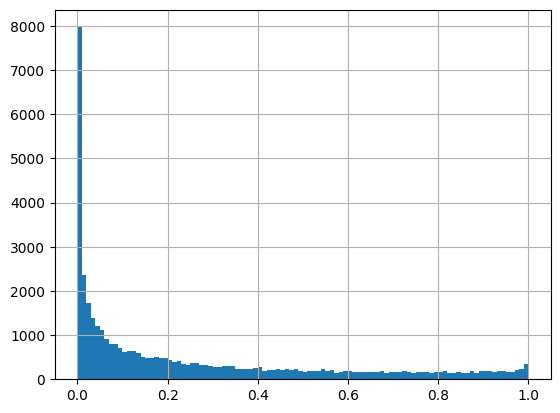

In [14]:
# example
# Visualize the distribution of acousticness with a histogram
spotify_population['acousticness'].hist(bins=np.arange(0, 1.01, 0.01)) # stop value is exclusive
plt.show()



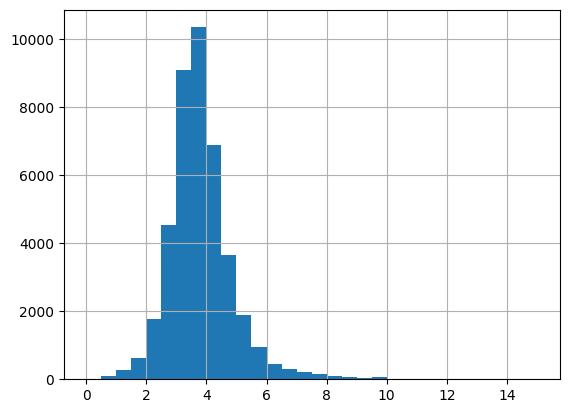

In [15]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

### (pseudo) random number generator

* pseudo-random number generation is fast and cheap
* next 'random' number calculated from previous 'random' number
* first 'random' number calculated from 'seed'
* using seed means all future values will be the same

`numpy` has many functions for generating random numbers, `numpy.random` such as `numpy.random.beta()`:
* .beta
* .binomial
* .chisquare
* .exponential
* .f
* .gamma
* .geometric
* .hypergeometric
* .lognormal
* .negative_binomial
* .normal
* .poisson
* .standard_t
* .uniform

In [ ]:
# example

# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Print uniforms
print(uniforms)

# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Print normals
print(normals)

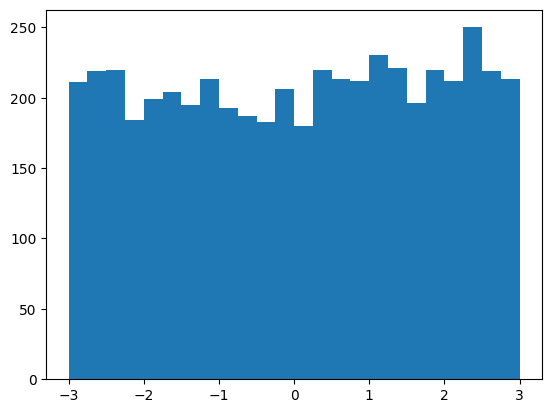

In [16]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Plot a histogram of uniform values, binwidth 0.25
plt.hist(uniforms, bins=np.arange(-3,3.25, 0.25))
plt.show()

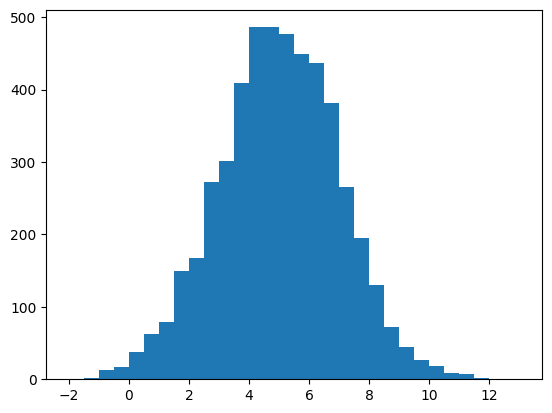

In [17]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals, bins=np.arange(-2, 13.5, 0.5))
plt.show()

## Sampling Methods

https://campus.datacamp.com/courses/sampling-in-python/sampling-methods?ex=1

### simple and systmeatic random sampling

* simple random sampling - `df.sample(n=int, random_state=seed_int)`
* systematic random sampling - samples at random intervals (in a pattern):

* `sample_size = int`
* `pop_size = len(df)`
* `interval = pop_size // sample_size` # // for integer division
* `df.iloc[::interval]` # selects every value by interval

* problem with systematic sampling if there is a pattern, for example where ealier samples have higher value than later rows - introduces bias
  * only use if the plot (scatter) looks like noise
* can shuffle the rows beforehand to remove pattern beforehand
* `shuffled = df.sample(frac=1)` # effectively randomly shuffles rows
* `shuffled = shuffled.reset_index(drop=True).reset_index()` # drop True to clear previous row indexes, chaining additional reset_index creates column with new indexes
* 

In [2]:
# example

# import attrition feather file data
attrition_pop = pd.read_feather('attrition.feather')

In [ ]:
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n=70, random_state=18900217)

# Print the sample
print(attrition_samp)

In [4]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

# Systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]

# Print the sample
#print(attrition_sys_samp)

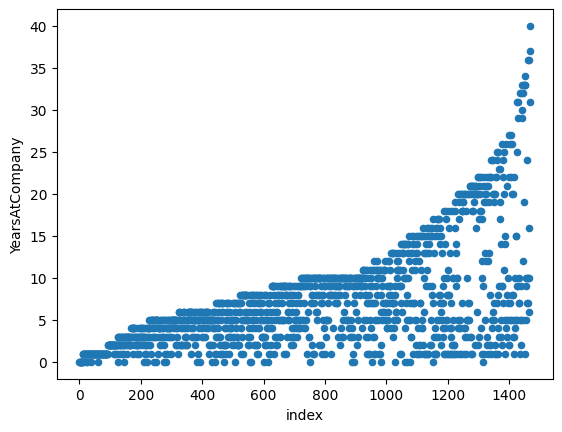

In [6]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(kind='scatter', y = 'YearsAtCompany', x = 'index')
plt.show()

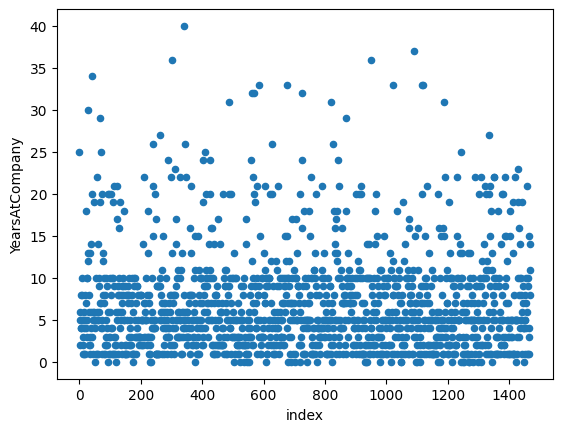

In [7]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(kind='scatter', x='index', y='YearsAtCompany')
plt.show()

### stratified and weighted random sampling

* stratified sampling - allows sampling a population containing subgroups

* normal sampling: 
* `df.sample(frac=0.1, random_state=2021)` # 10% sample
* `df['col'].value_counts(normalize=True)` # show proportions
* by chance, the proportions may not match the true population proportions 
* can group by the variable first - **proportional stratified sampling**

* `df_strat = df.groupby('col_group').sample(frac=0.1, random_state=2021)` # groupby first to sample with proportions
* `df_strat = df.groupby('col_group').sample(n=15, random_state=2021)` # equal counts stratified sampling
  
* **weighted random sampling:** - to correct for under/over represented groups
  * `df_weight = df`
  * `condition = df_weight['col'] == "of_interest"`
  * `df_weight['weight'] = np.where(condition, 2, 1)` # weighting rows where condition met as 2 and 1 for where condition not matched
  * ``df_weight = df_weight.sample(frac=0.1, weights = "weight")`


In [17]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)

# Print education_counts_pop
print(education_counts_pop)

# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby('Education', observed = False).sample(frac=0.4, random_state=2022)

# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize=True)

# Print education_counts_strat
print(education_counts_strat)

Education
Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: proportion, dtype: float64
Education
Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: proportion, dtype: float64


In [21]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education', observed=False)\
	.sample(n=30, random_state=2022)      

# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize=True)

# Print the results
print(education_counts_eq)

Education
Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: proportion, dtype: float64


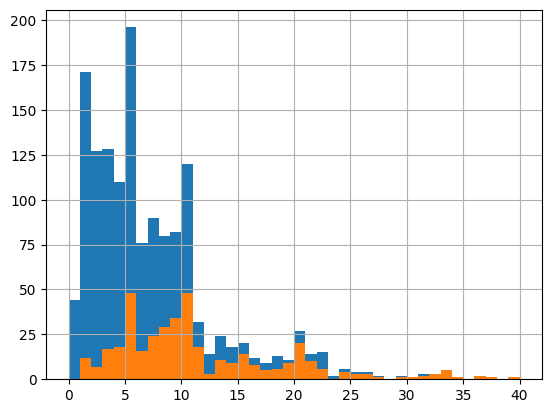

mean of population is: 7.0081632653061225
sample mean is 11.1475


In [26]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
#plt.show()

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins=(np.arange(0,41,1)))
plt.show()

print("mean of population is:", attrition_pop['YearsAtCompany'].mean())
print("sample mean is", attrition_weight['YearsAtCompany'].mean())


### cluster sampling

stratiified sampling: 
* split population into subgroups
* use simple random sampling on every subgroup

cluster sampling:
* use simple random sampling to pick some subgroups
* use simple random sampling on only those subgroups

**stages**
1. sampling for subgroups:
`import random`
`groups = list(df['col'].unique())`
`groups_samp = random.sample(groups, k=3)` # randomly cut down on number of groups
2. sampling each group
`group_condition = df['group'].isin(groups_samp)` 
`df_cluster = df[group_condition]` # filter dataset for rows where group is one of selected
`df_cluster['group'] = df_group['group].cat.remove_unused_categories()` # removes levels with zero rows
`df_cluster.groupby('group').sample(n=5, random_state=2021)`

**cluster sampling** - multistage clustering, can be several

In [30]:
# example
import random
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby('JobRole').sample(n=10, random_state=2022)


# Print the sample
print(attrition_clust)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1380   44        0.0      Travel_Rarely       1099                 Sales   
1395   46        0.0      Travel_Rarely        488                 Sales   
1300   42        0.0      Travel_Rarely        532  Research_Development   
1271   39        0.0      Travel_Rarely        117  Research_Development   
1354   42        0.0      Travel_Rarely       1059  Research_Development   
858    32        0.0      Travel_Rarely        495  Research_Development   
1417   59        0.0         Non-Travel       1420       Human_Resources   
1307   41        0.0      Travel_Rarely       1276                 Sales   
1377   52        0.0      Travel_Rarely       1053  Research_Development   
1388   50        0.0      Travel_Rarely        264                 Sales   
1463   56        0.0      Travel_Rarely       1400  Research_Development   
464    46        0.0         Non-Travel       1144  Research_Development   
1313   54   

C:\Users\zoona\AppData\Local\Temp\ipykernel_32408\1817153344.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()
C:\Users\zoona\AppData\Local\Temp\ipykernel_32408\1817153344.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_clust = attrition_filtered.groupby('JobRole').sample(n=10, random_state=2022)


### comparing sampling methods

*  random sampling 
*  stratified 
*  cluster

In [33]:
# example

# Perform simple random sampling to get 0.25 of the population
attrition_srs = attrition_pop.sample(frac=0.25, random_state = 2022)

# Perform stratified sampling to get 0.25 of each relationship group
attrition_strat = attrition_pop.groupby('RelationshipSatisfaction', observed=False).sample(frac=0.25, random_state = 2022)


In [43]:

# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition_pop['RelationshipSatisfaction'].unique())

# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique, k=2)

# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop['RelationshipSatisfaction'].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop[satis_condition]
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()

# Perform cluster sampling on the selected group, getting 0.25 of attrition_pop
attrition_clust = attrition_clust_prep.groupby('RelationshipSatisfaction', observed=False).sample(n=len(attrition_pop)//4, random_state=2022, replace=True)


C:\Users\zoona\AppData\Local\Temp\ipykernel_32408\397067106.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories().copy()


In [48]:
# Mean Attrition by RelationshipSatisfaction group
mean_attrition_pop = attrition_pop.groupby('RelationshipSatisfaction', observed=False)['Attrition'].mean()

# Print the result
print(mean_attrition_pop)

# Calculate the same thing for the simple random sample 
mean_attrition_srs = attrition_srs.groupby('RelationshipSatisfaction', observed=False)['Attrition'].mean()

# Print the result
print(mean_attrition_srs)

# Calculate the same thing for the stratified sample 
mean_attrition_strat = attrition_strat.groupby('RelationshipSatisfaction', observed=False)['Attrition'].mean()

# Print the result
print(mean_attrition_strat)

# Calculate the same thing for the cluster sample 
mean_attrition_clust =  attrition_clust.groupby('RelationshipSatisfaction', observed=False)['Attrition'].mean()


# Print the result
print(mean_attrition_clust)


RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64
RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64
RelationshipSatisfaction
Low          0.144928
Medium       0.078947
High         0.165217
Very_High    0.129630
Name: Attrition, dtype: float64
RelationshipSatisfaction
Medium    0.163488
High      0.160763
Name: Attrition, dtype: float64


## Sampling Distributions


### Relative error of point estimates

* how does sample size affect relative error?
* in general - larger sample sizes gets closer to population mean
* relative error - absolute error between sample and pop means
* 


In [4]:
import pandas as pd
#!pip install pyarrow

# import attrition feather file data
attrition_pop = pd.read_feather('attrition.feather')



In [5]:
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n=50, random_state = 2022)
mean_attrition_pop = attrition_pop['Attrition'].mean()
# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct50 = abs(mean_attrition_srs50-mean_attrition_pop)/mean_attrition_pop * 100

# Print rel_error_pct50
print(rel_error_pct50)

62.78481012658228


In [6]:
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 = abs(mean_attrition_srs100-mean_attrition_pop)/mean_attrition_pop * 100

# Print rel_error_pct100
print(rel_error_pct100)

6.962025316455694


### Sampling distribution

* point estimates like sample mean will vary depending on which rows are in the sample
* can loop to create many samples of the same size - e.g. 1000 sample means

```python
mean_col_1000 = []
for i in range(1000):
    mean_col_1000.append(
        df.sample(n=30)['col'].mean()
    )

plt.hist(mean_col_1000, bins = int)
plt.show()
```

[0.08333333333333333, 0.15, 0.23333333333333334, 0.21666666666666667, 0.13333333333333333]


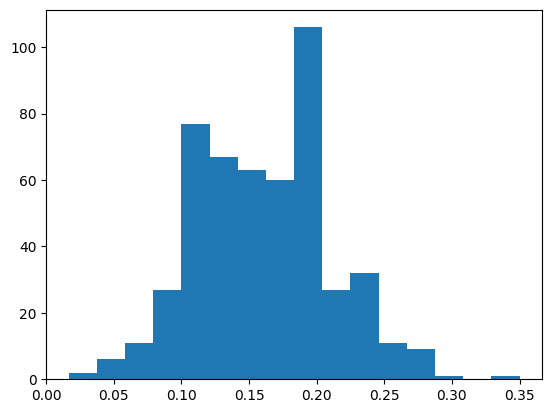

In [10]:
import matplotlib.pyplot as plt
# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)
  
# Print out the first few entries of the list
print(mean_attritions[0:5])

# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins=16)
plt.show()

### approximating sample means

* generate all possible combinations of 4 x 6-sided die rolls


In [20]:
# use expand grid from pandas to generate all combos
import itertools
def expand_grid(data_dict):
    """Create a dataframe from every combination of given values."""
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

dice = expand_grid(
    {'die1': [1,2,3,4,5,6],
     'die2': [1,2,3,4,5,6],
     'die3': [1,2,3,4,5,6],
     'die4': [1,2,3,4,5,6]
     }
)

dice['mean_roll'] = (dice['die1'] + dice['die2'] + dice['die3'] + dice['die4'])/4
print(dice)

      die1  die2  die3  die4  mean_roll
0        1     1     1     1       1.00
1        1     1     1     2       1.25
2        1     1     1     3       1.50
3        1     1     1     4       1.75
4        1     1     1     5       2.00
...    ...   ...   ...   ...        ...
1291     6     6     6     2       5.00
1292     6     6     6     3       5.25
1293     6     6     6     4       5.50
1294     6     6     6     5       5.75
1295     6     6     6     6       6.00

[1296 rows x 5 columns]


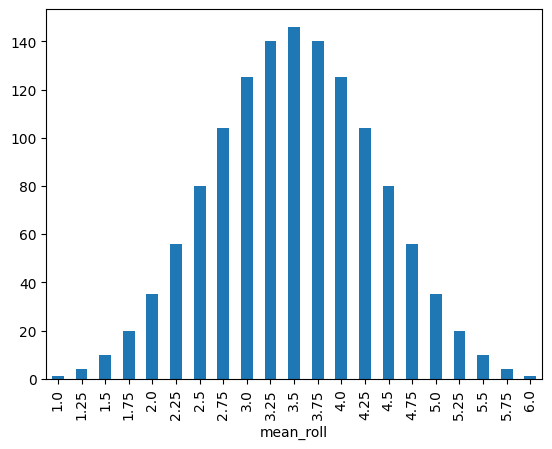

In [22]:
# visualise
dice['mean_roll'] = dice['mean_roll'].astype('category')
dice['mean_roll'].value_counts(sort=False).plot(kind='bar')
plt.show()

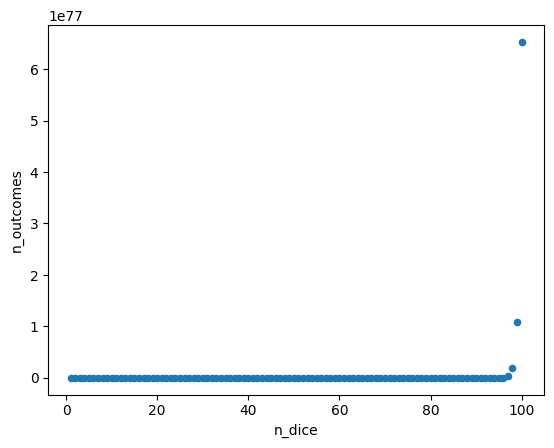

In [23]:
# number of outcomes increases by a factor of six each time

n_dice = list(range(1, 101))
n_outcomes = []
for n in n_dice:
    n_outcomes.append(6**n)

outcomes = pd.DataFrame(
    {'n_dice': n_dice,
     'n_outcomes': n_outcomes}
)


outcomes.plot(x = 'n_dice', y = 'n_outcomes', kind = 'scatter')
plt.show()

WIth 100 dice, the number of outcomes is approximately the same as the number of atoms in the univers - $6.5 * 10^{77}$
* computationally impossible to calculate exact sampling distribution
* rely on approximations

**simulate mean of four dice rolls**

* numpy's `random.choice` = `np.random.choice(list(range(1,7)), size=4, replace=True).mean()`

then use for loop:

* sample_means_1000 = []
* for i in range(1000):
    sample_means_1000.append(
        np.random.choice(list(range(1,7)), size=4, replace=True).mean()
    )
* plt.hist(sample_means_1000, bins=20)

* not perfect but pretty close

       die1  die2  die3  die4  die5 mean_roll
0         1     1     1     1     1       1.0
1         1     1     1     1     2       1.2
2         1     1     1     1     3       1.4
3         1     1     1     1     4       1.6
4         1     1     1     1     5       1.8
...     ...   ...   ...   ...   ...       ...
32763     8     8     8     8     4       7.2
32764     8     8     8     8     5       7.4
32765     8     8     8     8     6       7.6
32766     8     8     8     8     7       7.8
32767     8     8     8     8     8       8.0

[32768 rows x 6 columns]


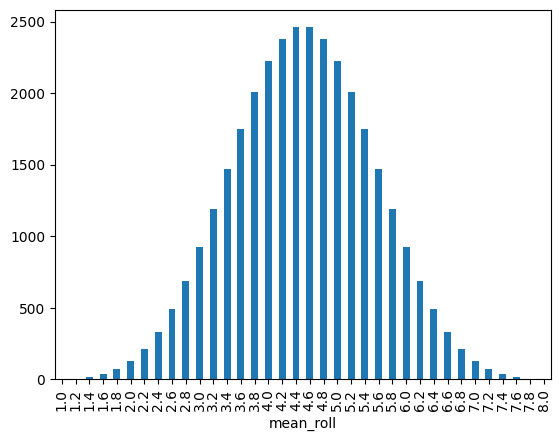

In [25]:
# Expand a grid representing 5 8-sided dice
dice = expand_grid(
    {'die1': [1,2,3,4,5,6,7,8],
     'die2': [1,2,3,4,5,6,7,8],
     'die3': [1,2,3,4,5,6,7,8],
     'die4': [1,2,3,4,5,6,7,8],
     'die5': [1,2,3,4,5,6,7,8]
     }
)


# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] + dice['die3'] + dice['die4'] + dice['die5'])/5
                     
                    
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Print result
print(dice)

# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort=False).plot(kind='bar')
plt.show()

4.2
[4.6, 3.6, 5.2, 5.0, 4.6, 4.6, 3.8, 5.6, 5.4, 4.4]


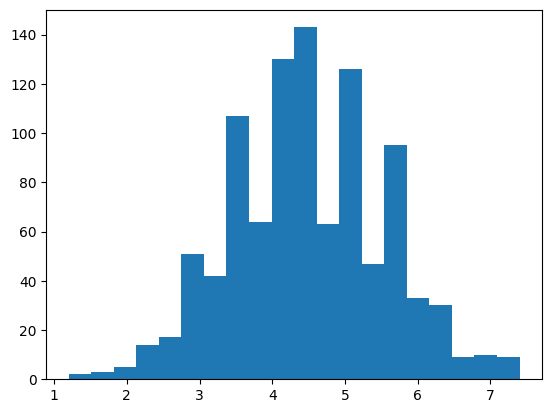

In [29]:
import numpy as np
# Sample one to eight, five times, with replacement
five_rolls = np.random.choice(list(range(1,9)), size=5, replace=True)

# Print the mean of five_rolls
print(five_rolls.mean())

# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )
    
# Print the first 10 entries of the result
print(sample_means_1000[0:10])

# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000, bins=20)
plt.show()

### Standard errors and the Central limit theorem

* `gaussian distribution` aka normal
* central limit theorom - averages of independent samples have approximately **normal distributions**
    * as sample size increases:
        * distribution of the averages gets *closer to being normally distributed*
        * width of the samplign distribution gets *narrower* (standard deviation decreases)
            * `ddof=0` when calling `.std()` on populations
            * `ddof=1` when calling `np.std()` on samples or sampling distribution

* dividing population std by square root of the sample size, we get an estimate of the std dev of the sampling distribution for that sample size
* **standard error** 



In [ ]:
# Calculate the mean of the mean attritions for each sampling distribution
mean_of_means_5 = np.mean(sampling_distribution_5)
mean_of_means_50 = np.mean(sampling_distribution_50)
mean_of_means_500 = np.mean(sampling_distribution_500)

# Print the results
print(mean_of_means_5)
print(mean_of_means_50)
print(mean_of_means_500)

# Calculate the std. dev. of the mean attritions for each sampling distribution
sd_of_means_5 = np.std(sampling_distribution_5, ddof=1)
sd_of_means_50 = np.std(sampling_distribution_50, ddof=1)
sd_of_means_500 = np.std(sampling_distribution_500, ddof=1)

# Print the results
print(sd_of_means_5)
print(sd_of_means_50)
print(sd_of_means_500)

## Bootstrap Distributions

* why sample with replacement?
    * resampling let's us approximate other theoretical observations which may exist in the population

**bootstrapping** - in some ways the opposite of sampling from a population
* in sampling - go from a population to a smaller sample
* in bootstrapping - build a theoretical population from the sample
    * develop understanding of sampling variability using a single sample

1. make a resample of the same size as the original sample
2. calculate the statistic of interest for this bootstrap sample, e.g. mean of a column
3. repeat steps 1 and 2 many times

resulting statistics are *bootstrap statistics* and form a *bootstrap distribution*

```py
import numpy as np

mean_flavours_1000 = []

for i in range(1000):
    mean_flavours_1000.append(
        np.mean(coffee_sample.sample(frac=1, replace=True)['flavour'])
    )

import matplotlib.pyplot as plt
plt.hist(mean_flavours_1000)
plt.show()

```


In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

spotify_population = pd.read_feather('spotify_2000_2020.feather')

In [20]:
spotify_sample = spotify_population[['artists', 'name', 'danceability', 'popularity']]
spotify_sample.reset_index(drop=False, inplace=True)
print(spotify_sample.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41656 entries, 0 to 41655
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         41656 non-null  int64  
 1   artists       41656 non-null  object 
 2   name          41656 non-null  object 
 3   danceability  41656 non-null  float64
 4   popularity    41656 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.6+ MB
None


In [16]:
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Print the resample
#print(spotify_1_resample)

# Calculate of the danceability column of spotify_1_resample
mean_danceability_1 = np.mean(spotify_1_resample['danceability'])

# Print the result
print(mean_danceability_1)

0.5905296523910122


[0.5915428869790667, 0.5906879753216824, 0.5911450091223353, 0.5911754969272135, 0.5916301925292875, 0.5899258858267717, 0.591488546667947, 0.5916235908392549, 0.5917393292682926, 0.5900604378720954, 0.5903996135010562, 0.5916466367390051, 0.592155422988285, 0.5917137651238717, 0.5914859852122143, 0.5906227146149414, 0.59251637699251, 0.5909273381985788, 0.5920642812560016, 0.5908528879393125, 0.5916600417706933, 0.5910037497599385, 0.5895545515652008, 0.5911393412713655, 0.5916690560783562, 0.5919061335701941, 0.5921248175532937, 0.5922424524678318, 0.5923976906087959, 0.5907300004801228, 0.5916285337046284, 0.5905962190320722, 0.5920428869790667, 0.5912954364317264, 0.5903172700211254, 0.5903738981179181, 0.5911554013827539, 0.5901731659304782, 0.5908211638179375, 0.5909088438640292, 0.5900308382946033, 0.5913296835990013, 0.5918854714806989, 0.5913494334549645, 0.5922080228538505, 0.5911071034184753, 0.5918572594584214, 0.5921574467063568, 0.5900604978874592, 0.5929270525254464, 0.5

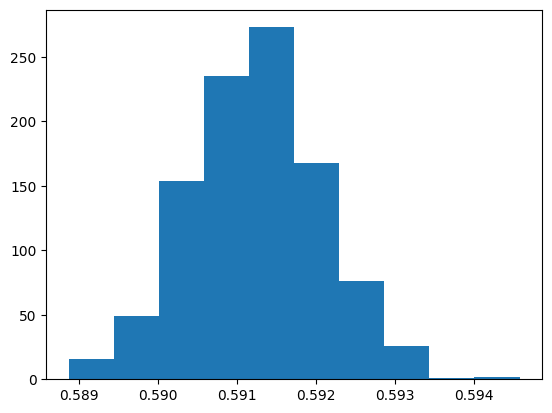

In [17]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)
  
# Print the result
print(mean_danceability_1000)

# Draw a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()

### compare bootstrap and sample distributions

interpreting the means

bootstrap distribution mean:
* usually close to the sample mean 
* may not be a good estimate of the population mean

**bootstrapping cannot correct biases from sampling**

standard deviation

* sample standard deviation
* estimated population standard deviation: `standard_error = np.std(bootstrap_distn, ddof=1)`
* *standard error* is the standard deviation of the statistic of interest `standard_error * np.sqrt(500)`
    * **Standard error times square root of sample size estimates the population standard deviation**


interpreting the standard errors

* *estimated standard error* -> standard deviation of the bootstrap distribution for a sample statistic
* population std dev ~~ std error * sqrt(sample size)



In [18]:
mean_popularity_2000_samp = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_samp.append(
    	# Sample 500 rows and calculate the mean popularity 
    	spotify_population.sample(n=500)['popularity'].mean()
    )

# Print the sampling distribution results
print(mean_popularity_2000_samp)

[55.354, 55.052, 54.046, 54.184, 54.87, 54.532, 55.242, 54.744, 54.702, 55.064, 55.194, 54.584, 54.91, 55.572, 55.464, 54.664, 55.264, 54.316, 54.986, 55.156, 55.13, 55.032, 54.702, 55.384, 54.786, 55.22, 54.554, 55.162, 55.066, 55.484, 55.354, 54.45, 54.566, 54.528, 54.658, 53.864, 54.106, 54.676, 54.614, 55.092, 54.29, 55.178, 54.104, 54.938, 54.518, 55.532, 55.078, 55.524, 54.976, 54.648, 55.45, 54.156, 55.164, 54.458, 55.396, 55.04, 54.636, 54.804, 54.476, 54.498, 54.644, 56.288, 54.978, 55.628, 53.98, 54.51, 54.69, 54.708, 54.84, 54.592, 53.768, 53.334, 54.282, 54.862, 55.102, 55.23, 54.908, 54.708, 54.06, 54.5, 54.668, 55.394, 54.622, 54.718, 55.55, 55.956, 54.558, 55.602, 54.91, 53.48, 54.65, 54.594, 55.372, 55.436, 54.506, 55.39, 54.308, 55.358, 54.038, 54.174, 54.574, 54.618, 54.89, 54.082, 53.834, 54.416, 55.058, 54.656, 54.52, 55.296, 55.092, 54.792, 54.832, 55.018, 54.778, 54.682, 55.218, 54.582, 55.844, 54.19, 55.044, 54.67, 55.16, 55.09, 54.776, 54.682, 54.074, 54.652, 54

In [21]:
mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_boot.append(
    	# Resample 500 rows and calculate the mean popularity     
    	spotify_sample.sample(n=500, replace=True)['popularity'].mean()
    )

# Print the bootstrap distribution results
print(mean_popularity_2000_boot)

[55.378, 54.38, 54.682, 54.868, 54.72, 54.672, 54.142, 55.004, 54.814, 54.54, 53.998, 55.188, 54.69, 56.018, 55.17, 55.154, 54.95, 54.712, 54.6, 54.85, 54.396, 53.788, 54.08, 55.15, 55.614, 54.886, 54.89, 55.218, 55.82, 54.72, 54.15, 55.022, 54.906, 54.472, 54.802, 55.078, 55.782, 54.306, 54.61, 54.836, 55.062, 55.062, 54.852, 55.504, 54.744, 54.578, 54.766, 55.488, 55.326, 55.168, 54.514, 54.22, 55.362, 54.766, 55.012, 54.736, 55.28, 54.34, 54.26, 54.41, 55.41, 54.86, 54.818, 54.482, 54.666, 55.158, 54.544, 54.706, 54.816, 55.146, 54.534, 55.236, 55.014, 54.232, 54.556, 54.318, 54.778, 54.86, 54.872, 55.096, 54.68, 55.644, 54.516, 55.324, 55.062, 54.346, 54.016, 54.572, 54.976, 54.464, 55.56, 55.398, 54.756, 54.584, 54.946, 55.42, 55.126, 54.486, 53.754, 55.318, 54.61, 54.71, 55.162, 55.006, 54.88, 54.42, 54.672, 54.76, 54.888, 55.296, 55.522, 55.156, 54.496, 54.788, 55.906, 55.088, 54.69, 54.862, 54.916, 54.306, 54.98, 55.9, 55.052, 55.156, 54.922, 54.122, 55.078, 54.594, 54.868, 56.

In [23]:
# Calculate the population mean popularity
pop_mean = spotify_population['popularity'].mean()

# Calculate the original sample mean popularity
samp_mean = spotify_sample['popularity'].mean()

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(mean_popularity_2000_samp)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(mean_popularity_2000_boot)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

[54.837142308430955, 54.837142308430955, 54.831176, 54.86668399999999]


In [25]:
# Calculate the population std dev popularity
pop_sd = spotify_population['popularity'].std(ddof=0)

# Calculate the original sample std dev popularity
samp_sd = spotify_sample['popularity'].std()

# Calculate the sampling dist'n estimate of std dev popularity
samp_distn_sd = np.std(mean_popularity_2000_samp, ddof=1) * np.sqrt(500)

# Calculate the bootstrap dist'n estimate of std dev popularity
boot_distn_sd = np.std(mean_popularity_2000_boot, ddof=1) * np.sqrt(500)

# Print the standard deviations
print([pop_sd, samp_sd, samp_distn_sd, boot_distn_sd])

[10.880065274257536, 10.880195870824291, 11.017091297721516, 10.826201244605349]


#### Confidence intervals

* values within standard deviations
* 95% - use quantile - .025 to .975 `np.quantile(dist, quantile)`

**inverse cumulative distribution function**

* PDF: bell curve
* CDF: integrate to get area under bell curve
* Inverse CDF: flip x and y axes

`from scipy.stats import norm`
`norm.ppf(quantile, loc=0, scale=1)` (-1.96, 1.96)

**standard error method for confidence interval**

* point_estimate = np.mean(df_distn)
* std_error = np.std(df_distn, ddof=1)
* from scipy.stats import norm
* lower = norm.ppf(0.025, loc=point_estimate, scale=std_error)
* upper = norm.ppf(0.975, loc=point_estimate, scale=std_error)
* print((lower, upper))

In [26]:
# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(mean_popularity_2000_boot, 0.025)
upper_quant = np.quantile(mean_popularity_2000_boot, 0.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

(53.915949999999995, 55.810050000000004)


In [28]:
from scipy.stats import norm
# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(mean_popularity_2000_boot)
standard_error = np.std(mean_popularity_2000_boot, ddof=1)

# Find the lower limit of the confidence interval
lower_se = norm.ppf(0.025, loc=point_estimate, scale=standard_error)

# Find the upper limit of the confidence interval
upper_se = norm.ppf(0.975, loc=point_estimate, scale=standard_error)

# Print standard error method confidence interval
print((lower_se, upper_se))

(53.917743058028506, 55.81562494197148)
